In [1]:
##Importing seaborn, numpy, pandas, matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##since github is restricted to 100MB file, so I decided to use GoogleDrive to store my data (I have already made it public so this should be fine)
from google.colab import drive
drive.mount('/content/drive')
DATA="/content/drive/MyDrive/data_MS2"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#this line make sure that the files are in the right place
import os, pandas as pd
print(os.listdir(DATA))

['recommendations.csv', 'games.csv']


In [6]:
#read the csv
games = pd.read_csv(f"{DATA}/games.csv")
users = pd.read_csv(f"{DATA}/users.csv")
recs  = pd.read_csv(f"{DATA}/recommendations.csv")

pd.set_option('display.max_columns', None)
display(games)
display(users)
display(recs)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2
...,...,...,...
14306059,5047430,6,0
14306060,5048153,0,0
14306061,5059205,31,0
14306062,5074363,0,0


,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4
...,...,...,...,...,...,...,...,...
41154789,633230,0,0,2021-02-15,True,41.0,1606890,41154789
41154790,758870,8,0,2019-07-18,False,8.0,1786254,41154790
41154791,696170,3,10,2018-03-26,False,2.0,6370324,41154791
41154792,696170,0,0,2018-06-11,True,4.0,1044289,41154792


In [7]:
##to see how many observations we have and also check the duplications
print("=== Users Table ===")
print("Raw rows:", users.shape[0])
print("Unique users:", users["user_id"].nunique())
print("Duplicate users:", users.duplicated(subset=["user_id"]).sum())
print()

print("=== Games Table ===")
print("Raw rows:", games.shape[0])
print("Unique games:", games["app_id"].nunique())
print("Duplicate games:", games.duplicated(subset=["app_id"]).sum())
print()

print("=== Recommendations Table ===")
print("Raw rows:", recs.shape[0])
print("Unique (user_id, app_id) pairs:",
      recs.drop_duplicates(subset=["user_id", "app_id"]).shape[0])
print("Duplicate interactions:",
      recs.duplicated(subset=["user_id", "app_id"]).sum())

=== Users Table ===
Raw rows: 14306064
Unique users: 14306064
Duplicate users: 0

=== Games Table ===
Raw rows: 50872
Unique games: 50872
Duplicate games: 0

=== Recommendations Table ===
Raw rows: 41154794
Unique (user_id, app_id) pairs: 41154773
Duplicate interactions: 21


# Above shows that we have 41154773 observation and 21 duplicate

In [8]:
# --- Missing Values Check ---

print("=== Users Table ===")
print(users.isna().sum())
print()

print("=== Games Table ===")
print(games.isna().sum())
print()

print("=== Recommendations Table ===")
print(recs.isna().sum())

=== Users Table ===
user_id     0
products    0
reviews     0
dtype: int64

=== Games Table ===
app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

=== Recommendations Table ===
app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64


# no value missing

# As we can see there are no missing data

# Description of Data All together
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        table {
            width: 75%;
            border-collapse: collapse;
            margin: 20px 0;
            font-size: 0.85em;
            font-family: Arial;
            text-align: left;
        }
        th{
          text-align: center
        }
    </style>
    
</head>
<body>
<table>
  <tr>
    <th>Feature Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>app_id</td>
    <td>Native product ID on Steam</td>
  </tr>
  <tr>
    <td>title</td>
    <td>Product title</td>
  </tr>
  <tr>
    <td>date_release</td>
    <td>Product release date</td>
  </tr>
  <tr>
    <td>win</td>
    <td>Does it supports Windows?</td>
  </tr>
  <tr>
    <td>mac</td>
    <td>Does it supports MacOs?</td>
  </tr>
  <tr>
    <td>linux</td>
    <td>Does it supports Linux?</td>
  </tr>
  <tr>
    <td>rating</td>
    <td>Product rating category</td>
  </tr>
  <tr>
    <td>positive_ratio</td>
    <td>Ratio of positive feedbacks</td>
  </tr>
  <tr>
    <td>price_final</td>
    <td>Amount of user reviews availble on the Steam page (NOT in the dataset)</td>
  </tr>
  <tr>
    <td>helpful</td>
    <td>How many users found a recommendation helpful</td>
  </tr>
  <tr>
    <td>funny</td>
    <td>How many users found a recommendation funny</td>
  </tr>
  <tr>
    <td>date</td>
    <td>Date of publishing the recommendations to the users</td>
  </tr>
  <tr>
    <td>is_recommended</td>
    <td>Is the user recommending the product?</td>
  </tr>
  <tr>
    <td>hours</td>
    <td>How may hours played by user</td>
  </tr>
  <tr>
    <td>user_id</td>
    <td>User's anonymized ID</td>
  </tr>
  <tr>
    <td>review_id</td>
    <td>Autogenerated ID</td>
  </tr>
  <tr>
    <td>products</td>
    <td>Number of games/add-ons purchased by the user</td>
  </tr>
  <tr>
    <td>reviews</td>
    <td>Number of reviews published</td>
  </tr>
</table>
</body>

# Continuous or Categorical?
<head>   
</head>
<body>
<table>
  <tr>
    <th>Feature Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>app_id</td>
    <td>categorical, Identifier features</td>
  </tr>
  <tr>
    <td>title</td>
    <td>categorical, Identifier features</td>
  </tr>
  <tr>
    <td>date_release</td>
    <td>continuous, predictor, Numeric feature for when the game was released <td>
  </tr>
  <tr>
    <td>win</td>
    <td>Binary</td>
  </tr>
  <tr>
    <td>mac</td>
    <td>Binary</td>
  </tr>
  <tr>
    <td>linux</td>
    <td>Binary</td>
  </tr>
  <tr>
    <td>rating</td>
    <td>continuous, numeric target variable to be predicted </td>
  </tr>
  <tr>
    <td>positive_ratio</td>
    <td>continuous, numeric target variable to be predicted</td>
  </tr>
  <tr>
    <td>price_final</td>
    <td>Continuous, Predictor variable (not target)</td>
  </tr>
  <tr>
    <td>helpful</td>
    <td>Binary, target varible to be predicted</td>
  </tr>
  <tr>
    <td>funny</td>
    <td>Binary, target varible to be predicted</td>
  </tr>
  <tr>
    <td>date</td>
    <td>Continuous</td>
  </tr>
  <tr>
    <td>is_recommended</td>
    <td>Binary, target varible to be predicted</td>
  </tr>
  <tr>
    <td>hours</td>
    <td>Continuous, target varible to be predicted, which is very useful as a indication to determine if the user love the game or not, higher it goes more they like it</td>
  </tr>
  <tr>
    <td>user_id</td>
    <td>categorical, Identifier features</td>
  </tr>
  <tr>
    <td>review_id</td>
    <td>categorical, Identifier features, which is probabiliy meaningless</td>
  </tr>
  <tr>
    <td>products</td>
    <td>Discrete numeric,Predictor variable (helps explain user behavior, not a target)</td>
  </tr>
  <tr>
    <td>Discrete numeric</td>
    <td>Predictor variable, we can use this to compare with rating which we can see if most of the comments were negative or not</td>
  </tr>
</table>
</body>

In [9]:
rating_map = {
    "Overwhelmingly Positive": 1.0,
    "Very Positive": 0.8,
    "Positive": 0.6,
    "Mostly Positive": 0.6,
    "Mixed": 0.4,
    "Mostly Negative": 0.2,
    "Negative": 0.0,
    "Very Negative": 0.0,
    "Overwhelmingly Negative": 0.0
}

In [10]:
##add a new feature
games["rating_scale"] = games["rating"].map(rating_map)

In [11]:
##check if it has unexpected strings
unmapped = games.loc[games["rating_scale"].isna(), "rating"].unique()
print("Unmapped categories:", unmapped)


Unmapped categories: []


In [12]:
games[["rating", "rating_scale"]].head()


,rating,rating_scale
0,Very Positive,0.8
1,Positive,0.6
2,Very Positive,0.8
3,Mixed,0.4
4,Very Positive,0.8


In [13]:
##change boolean into 1 or 0
games["win"] = games["win"].astype(int)
games["mac"] = games["mac"].astype(int)
games["linux"] = games["linux"].astype(int)
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,rating_scale
0,13500,Prince of Persia: Warrior Within™,2008-11-21,1,0,0,Very Positive,84,2199,9.99,9.99,0.0,True,0.8
1,22364,BRINK: Agents of Change,2011-08-03,1,0,0,Positive,85,21,2.99,2.99,0.0,True,0.6
2,113020,Monaco: What's Yours Is Mine,2013-04-24,1,1,1,Very Positive,92,3722,14.99,14.99,0.0,True,0.8
3,226560,Escape Dead Island,2014-11-18,1,0,0,Mixed,61,873,14.99,14.99,0.0,True,0.4
4,249050,Dungeon of the ENDLESS™,2014-10-27,1,1,0,Very Positive,88,8784,11.99,11.99,0.0,True,0.8


In [14]:
##drop the useless feature since discount was all zero and does not effect what I want to predict, which is to see if poelpe will like the game I recommed them or not, that is not related to price
games.drop(columns=["discount", "steam_deck"], inplace=True)

In [15]:
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,rating_scale
0,13500,Prince of Persia: Warrior Within™,2008-11-21,1,0,0,Very Positive,84,2199,9.99,9.99,0.8
1,22364,BRINK: Agents of Change,2011-08-03,1,0,0,Positive,85,21,2.99,2.99,0.6
2,113020,Monaco: What's Yours Is Mine,2013-04-24,1,1,1,Very Positive,92,3722,14.99,14.99,0.8
3,226560,Escape Dead Island,2014-11-18,1,0,0,Mixed,61,873,14.99,14.99,0.4
4,249050,Dungeon of the ENDLESS™,2014-10-27,1,1,0,Very Positive,88,8784,11.99,11.99,0.8


In [16]:
##drop the review_id since it is just some random number which most likely does not have any meaning
recs.drop(columns=["review_id"], inplace=True)
recs.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id
0,975370,0,0,2022-12-12,True,36.3,51580
1,304390,4,0,2017-02-17,False,11.5,2586
2,1085660,2,0,2019-11-17,True,336.5,253880
3,703080,0,0,2022-09-23,True,27.4,259432
4,526870,0,0,2021-01-10,True,7.9,23869


In [17]:
# --- Normalize helpful, funny, and hours ---
for col in ["helpful", "funny", "hours"]:
    # log1p transform (safe for zeros, reduces skew)
    recs[col + "_log"] = np.log1p(recs[col])

    # min-max normalization into [0,1]
    col_min = recs[col + "_log"].min()
    col_max = recs[col + "_log"].max()
    recs[col + "_norm"] = (recs[col + "_log"] - col_min) / (col_max - col_min)

# Quick check
print(recs[["helpful", "helpful_norm", "funny", "funny_norm", "hours", "hours_norm"]].head())
print(recs[["helpful_norm", "funny_norm", "hours_norm"]].describe())

   helpful  helpful_norm  funny  funny_norm  hours  hours_norm
0        0      0.000000      0         0.0   36.3    0.523827
1        4      0.153321      0         0.0   11.5    0.365584
2        2      0.104658      0         0.0  336.5    0.842636
3        0      0.000000      0         0.0   27.4    0.484369
4        0      0.000000      0         0.0    7.9    0.316418
       helpful_norm    funny_norm    hours_norm
count  4.115479e+07  4.115479e+07  4.115479e+07
mean   3.691283e-02  1.123732e-02  4.908337e-01
std    8.271190e-02  4.964360e-02  2.406423e-01
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  3.147820e-01
50%    0.000000e+00  0.000000e+00  4.838588e-01
75%    0.000000e+00  0.000000e+00  6.668594e-01
max    1.000000e+00  1.000000e+00  1.000000e+00


In [18]:
##change boolean into 1 or 0 for recommended
recs["is_recommended"] = recs["is_recommended"].astype(int)


In [19]:
recs.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,helpful_log,helpful_norm,funny_log,funny_norm,hours_log,hours_norm
0,975370,0,0,2022-12-12,1,36.3,51580,0.000000,0.000000,0.0,0.0,3.618993,0.523827
1,304390,4,0,2017-02-17,0,11.5,2586,1.609438,0.153321,0.0,0.0,2.525729,0.365584
2,1085660,2,0,2019-11-17,1,336.5,253880,1.098612,0.104658,0.0,0.0,5.821566,0.842636
3,703080,0,0,2022-09-23,1,27.4,259432,0.000000,0.000000,0.0,0.0,3.346389,0.484369
4,526870,0,0,2021-01-10,1,7.9,23869,0.000000,0.000000,0.0,0.0,2.186051,0.316418


In [20]:
# --- Normalize products in users ---
col = "products"

# log1p transform (safe for zeros, reduces skew)
users[col + "_log"] = np.log1p(users[col])

# min-max normalization into [0,1]
col_min = users[col + "_log"].min()
col_max = users[col + "_log"].max()
users[col + "_norm"] = (users[col + "_log"] - col_min) / (col_max - col_min)

# Quick check
print(users[[col, col + "_norm"]].head())
print(users[[col + "_norm"]].describe())

   products  products_norm
0       359       0.567052
1       156       0.487105
2       329       0.558669
3       176       0.498657
4        98       0.442682
       products_norm
count   1.430606e+07
mean    3.837753e-01
std     1.236120e-01
min     0.000000e+00
25%     3.061654e-01
50%     3.877918e-01
75%     4.674319e-01
max     1.000000e+00


In [21]:
users.head()

,user_id,products,reviews,products_log,products_norm
0,7360263,359,0,5.886104,0.567052
1,14020781,156,1,5.056246,0.487105
2,8762579,329,4,5.799093,0.558669
3,4820647,176,4,5.176150,0.498657
4,5167327,98,2,4.595120,0.442682


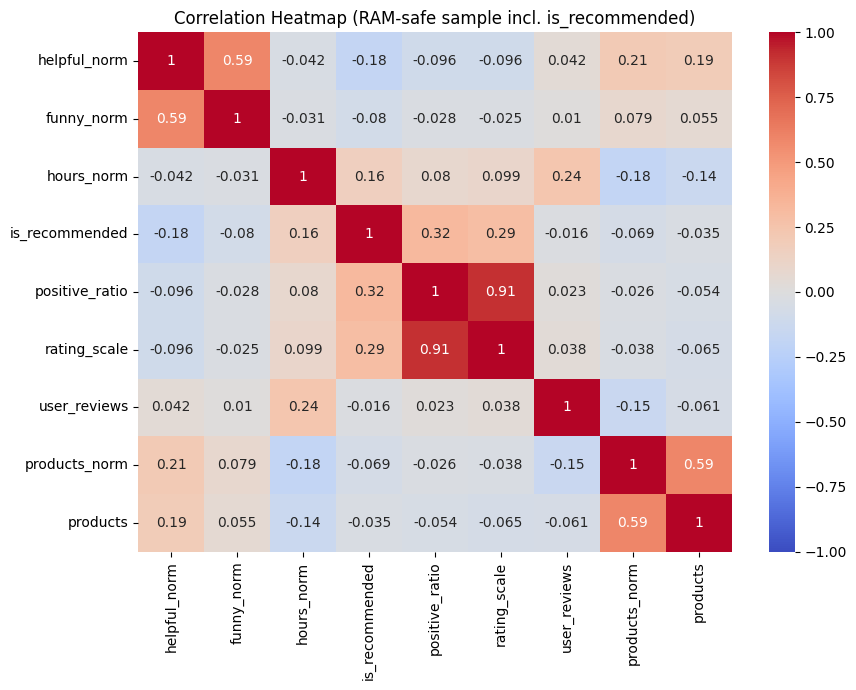

In [22]:
# --- 1) Sample recs to keep RAM safe ---
recs_small = recs.sample(n=min(50000, len(recs)), random_state=42)

# --- 2) Pick features ---
recs_feats  = ["helpful_norm", "funny_norm", "hours_norm", "is_recommended"]  # added is_recommended
games_feats = ["positive_ratio", "rating_scale", "user_reviews"]  # adjust names if slightly different
users_feats = ["products_norm", "products"]

# --- 3) Merge everything ---
merged = (
    recs_small[["user_id", "app_id"] + recs_feats]
    .merge(games[["app_id"] + games_feats], on="app_id", how="inner")
    .merge(users[["user_id"] + users_feats], on="user_id", how="inner")
)

# --- 4) Correlation + heatmap ---
corr = merged[recs_feats + games_feats + users_feats].corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (RAM-safe sample incl. is_recommended)")
plt.tight_layout()
plt.show()

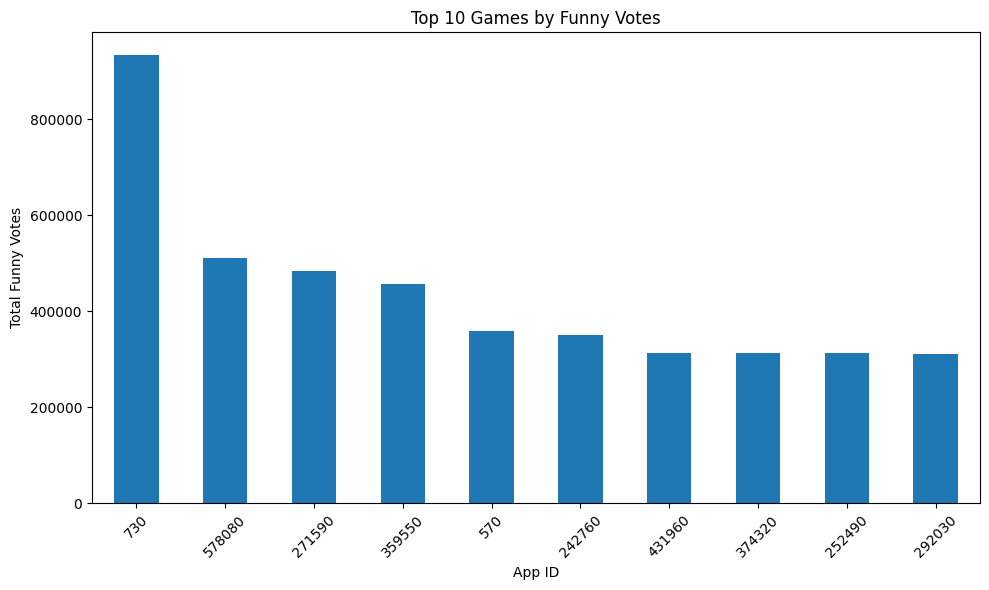

In [23]:
# group by app_id and sum funny votes
funny_by_game = recs.groupby("app_id")["funny"].sum().sort_values(ascending=False).head(10)

# plot
plt.figure(figsize=(10,6))
funny_by_game.plot(kind="bar")
plt.ylabel("Total Funny Votes")
plt.xlabel("App ID")
plt.title("Top 10 Games by Funny Votes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

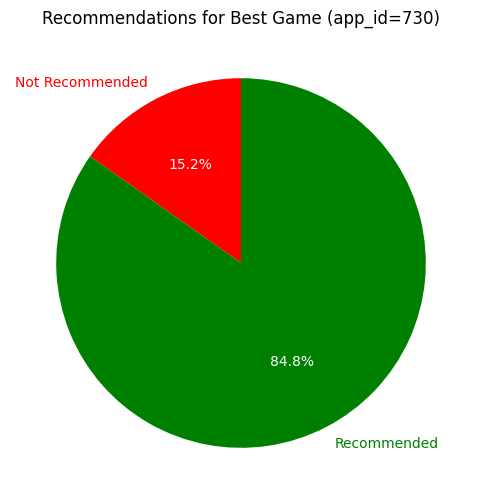

In [30]:
# --- 1) Find the best game (highest funny votes) ---
best_game_id = recs.groupby("app_id")["funny"].sum().idxmax()

# --- 2) Filter recs for that game ---
best_game_recs = recs[recs["app_id"] == best_game_id]

# --- 3) Count recommendations ---
recommend_counts = best_game_recs["is_recommended"].value_counts()

# --- 4) Pie chart with matching text colors ---
plt.figure(figsize=(6,6))
colors = ["red", "green"]

wedges, texts, autotexts = plt.pie(
    recommend_counts,
    labels=["Not Recommended", "Recommended"] if 0 in recommend_counts.index else ["Recommended"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    textprops={"color": "w"}  # set inside text to white first
)

# Match label and percentage text colors with pie slice colors
for text, autotext, wedge in zip(texts, autotexts, wedges):
    color = wedge.get_facecolor()
    text.set_color(color)       # outside label
    autotext.set_color("white") # inside % stays white for contrast

plt.ylabel("")
plt.title(f"Recommendations for Best Game (app_id={best_game_id})")
plt.show()


As we can see above the most popular game got highly recommand. which is very intuitive, and this also show that we handle the data in correct way.

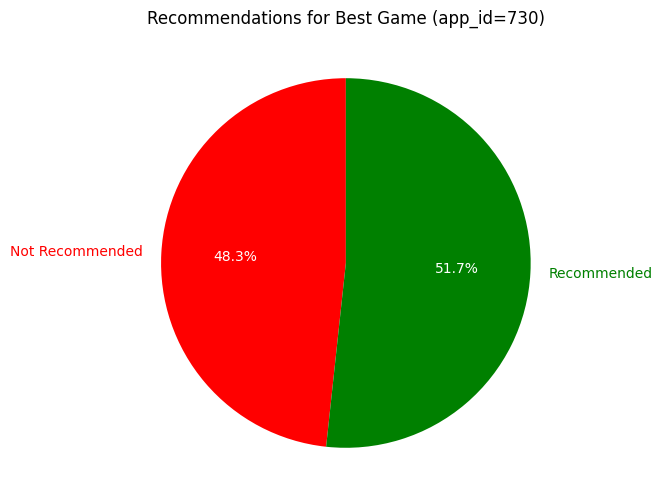

In [31]:
# --- 1)
# Sort funny sums in descending order
funny_sums = recs.groupby("app_id")["funny"].sum().sort_values(ascending=False)

# Get the 2nd entry
second_game_id = funny_sums.index[1]


# --- 2) Filter recs for that game ---
best_game_recs = recs[recs["app_id"] == second_game_id]

# --- 3) Count recommendations (ensure index order: 0 then 1)
recommend_counts = best_game_recs["is_recommended"].value_counts().sort_index()

# --- 4) Pie chart with matching text colors ---
plt.figure(figsize=(6,6))
colors = ["red", "green"]  # red = not recommended, green = recommended

labels = ["Not Recommended", "Recommended"]

wedges, texts, autotexts = plt.pie(
    recommend_counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    textprops={"color": "w"}
)

# Match label and percentage text colors with slice colors
for text, autotext, wedge in zip(texts, autotexts, wedges):
    color = wedge.get_facecolor()
    text.set_color(color)
    autotext.set_color("white")

plt.ylabel("")
plt.title(f"Recommendations for Best Game (app_id={best_game_id})")
plt.show()

This result is interesting. From the plots, we can see that the first game received far more votes than the others, and its recommendation pattern is very similar to the second game. The large gap between these two and the rest suggests that the top two games might carry redundant information. Therefore, we could consider keeping only one of them to avoid duplication in the analysis.
For now, I decided to keep both, since further analysis might reveal important differences.